In [2]:
import pandas as pd
import numpy as np

In [3]:
!wget -O Fake_True.csv https://www.dropbox.com/scl/fi/wnq5q8ld4ehrkoc667zxw/Fake_True_new.csv?rlkey=qm9hbdltkwmkx62lboi5jotoo&st=2xtyw2hh&dl=0

--2024-08-23 10:44:16--  https://www.dropbox.com/scl/fi/wnq5q8ld4ehrkoc667zxw/Fake_True_new.csv?rlkey=qm9hbdltkwmkx62lboi5jotoo
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1655e37cff0dcada8d365b2362.dl.dropboxusercontent.com/cd/0/inline/CZJ1eKBSektyojIwkR159mfRp0qQaPB7XXShxOg0LlPzis2zS9_mc2LX6b2S-IxVzSW9zP7UsSYtsUn5k2NgwGuDW_LJg7GWjeXmUuPZCgk8jZhcg2h6iJ4_1L2azmX8iRm8eLhI1dKTp2HtNo0yQbWF/file# [following]
--2024-08-23 10:44:17--  https://uc1655e37cff0dcada8d365b2362.dl.dropboxusercontent.com/cd/0/inline/CZJ1eKBSektyojIwkR159mfRp0qQaPB7XXShxOg0LlPzis2zS9_mc2LX6b2S-IxVzSW9zP7UsSYtsUn5k2NgwGuDW_LJg7GWjeXmUuPZCgk8jZhcg2h6iJ4_1L2azmX8iRm8eLhI1dKTp2HtNo0yQbWF/file
Resolving uc1655e37cff0dcada8d365b2362.dl.dropboxusercontent.com (uc1655e37cff0dcada8d365b2362.dl.dropboxusercontent.com)... 162.125.2.15,

In [4]:
df = pd.read_csv("Fake_True.csv")

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['text'])
y = df['reliability']

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=50)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=50)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5752
           1       1.00      1.00      1.00      5315

    accuracy                           1.00     11067
   macro avg       1.00      1.00      1.00     11067
weighted avg       1.00      1.00      1.00     11067



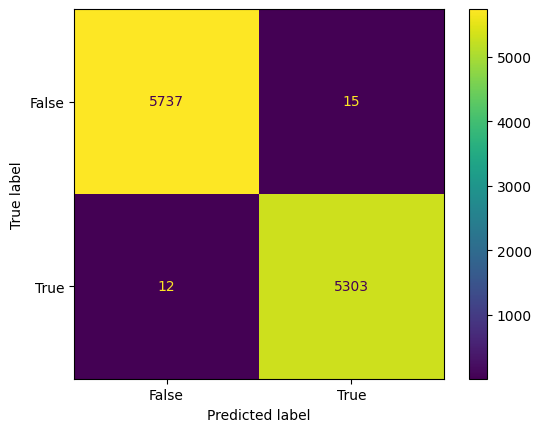

Accuracy Score of SVC: 99.756031444836 %


In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model.predict(x_test)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
print(report)
cm_display.plot()
plt.show()
print("Accuracy Score of SVC:", acc*100,"%")